In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn

In [2]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

Using Theano backend.
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/kumar.deepak/opt/ana

In [3]:
X_train.shape

(50000, 32, 32, 3)

In [4]:
X_test.shape

(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_test.shape

(10000, 1)

[7]


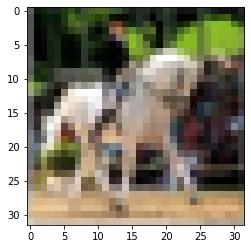

In [7]:
i = 1200
plt.imshow(X_train[i])
print(y_train[i])

/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


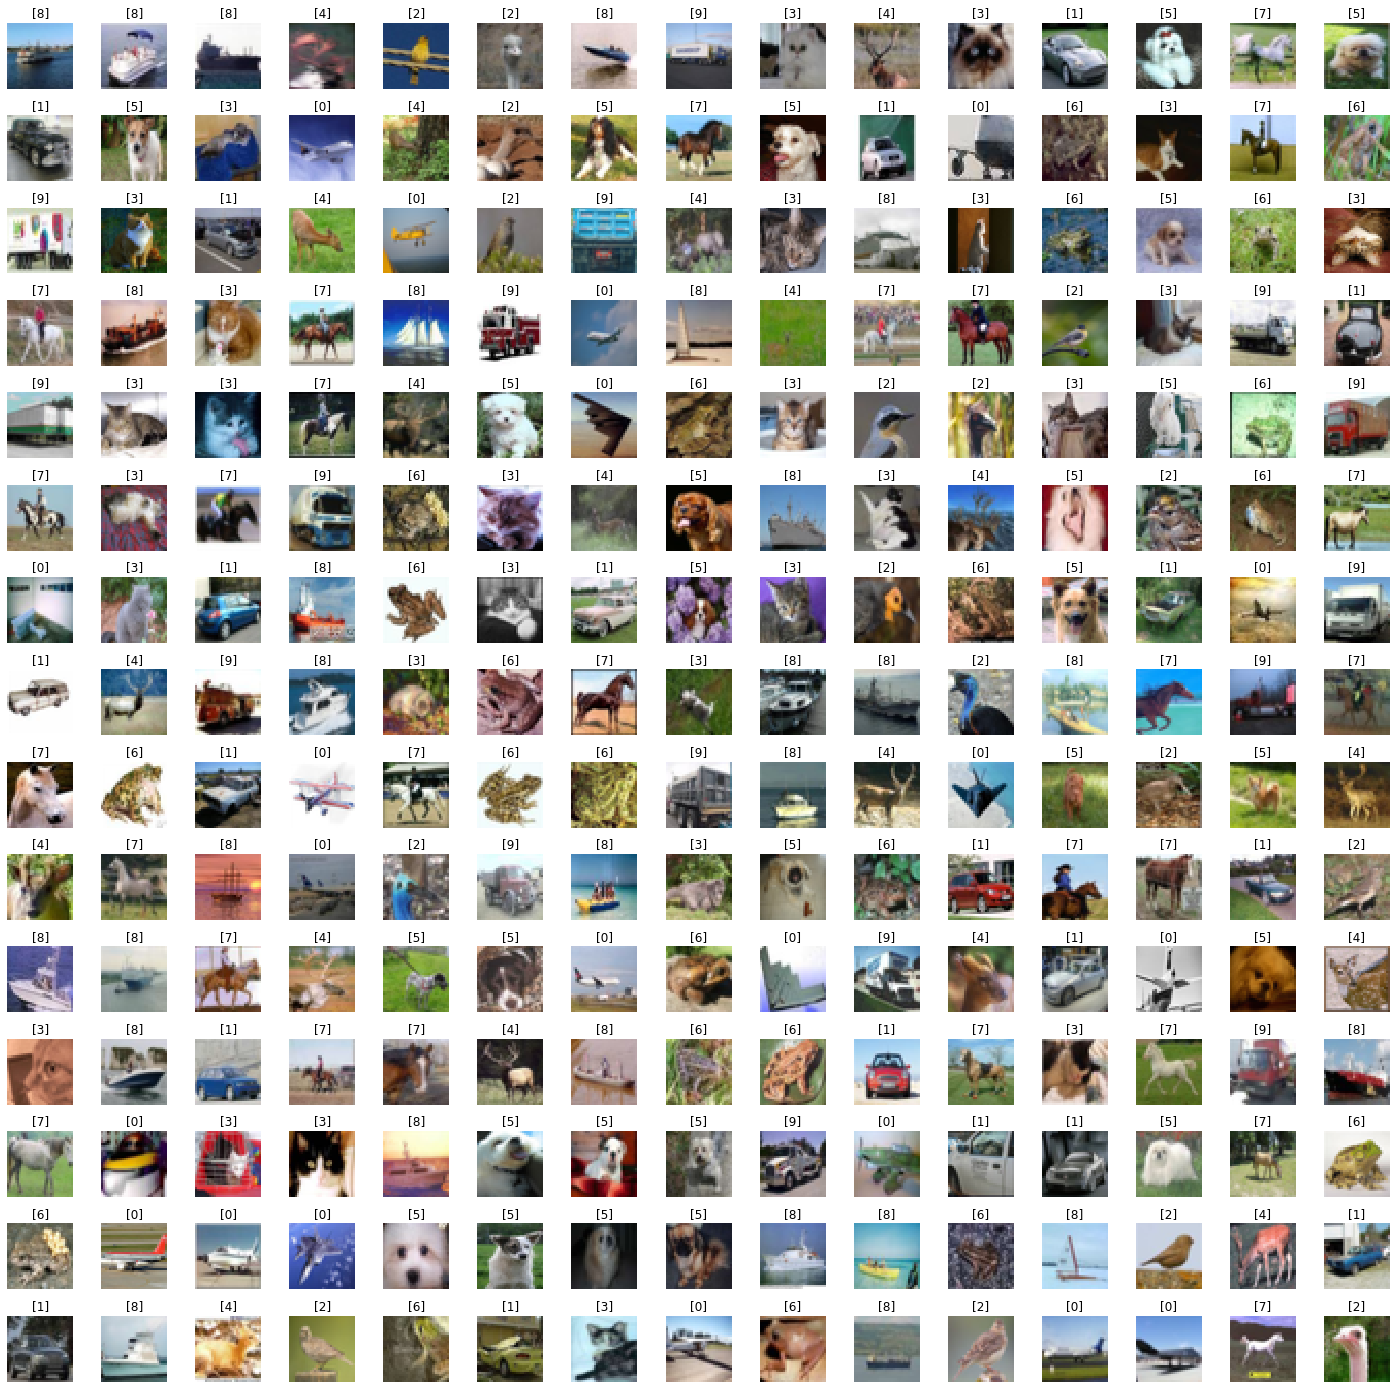

In [8]:
W_grid = 15
L_grid = 15 

fig,axes = plt.subplots(L_grid, W_grid , figsize = (25,25))
axes = axes.ravel()

n_training = len(X_train)

for i in np.arange(0, L_grid * W_grid):
    index = np.random.randint(0, n_training) #pick a random number here
    axes[i].imshow(X_train[index])
    axes[i].set_title(y_train[index]) #mapping the index with class
    axes[i].axis('off')

plt.subplots_adjust(hspace = 0.4)


In [9]:
n_training

50000

In [10]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [11]:
number_cat = 10

In [12]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [13]:
import keras
y_train = keras.utils.to_categorical(y_train,number_cat)

In [14]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [15]:
y_test = keras.utils.to_categorical(y_test,number_cat)

In [16]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [17]:
X_train = X_train/255
X_test = X_test/255


In [18]:
X_train

array([[[[0.23137255, 0.24313726, 0.24705882],
         [0.16862746, 0.18039216, 0.1764706 ],
         [0.19607843, 0.1882353 , 0.16862746],
         ...,
         [0.61960787, 0.5176471 , 0.42352942],
         [0.59607846, 0.49019608, 0.4       ],
         [0.5803922 , 0.4862745 , 0.40392157]],

        [[0.0627451 , 0.07843138, 0.07843138],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509805, 0.21568628],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117648, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215687, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941177, 0.19607843],
         [0.47058824, 0.32941177, 0.19607843],
         [0.42745098, 0.28627452, 0.16470589]],

        ...,

        [[0.8156863 , 0.6666667 , 0.3764706 ],
         [0.7882353 , 0.6       , 0.13333334]

In [19]:
X_train.shape

(50000, 32, 32, 3)

In [20]:
Input_shape = X_train.shape[1:]

In [21]:
Input_shape

(32, 32, 3)

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D,AveragePooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard


In [23]:
cnn_model = Sequential() 
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu',input_shape = Input_shape)) 
cnn_model.add(Conv2D(filters = 64, kernel_size = (3,3), activation ='relu')) 
cnn_model.add(MaxPooling2D(2,2)) 
cnn_model.add(Dropout(0.4))

cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu')) 
cnn_model.add(Conv2D(filters = 128, kernel_size = (3,3), activation ='relu')) 
cnn_model.add(MaxPooling2D(2,2)) 
cnn_model.add(Dropout(0.4))

cnn_model.add(Flatten())

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 1024, activation = 'relu'))

cnn_model.add(Dense(units = 10, activation = 'softmax'))

In [24]:
cnn_model.compile(loss = 'categorical_crossentropy', optimizer = keras.optimizers.rmsprop(lr = 0.001),metrics= ['accuracy'])

In [25]:
history = cnn_model.fit(X_train,y_train, batch_size= 32 ,epochs= 2 , shuffle= True)

Epoch 1/2
50000/50000 [==============================] - 569s 11ms/step - loss: 1.6176 - accuracy: 0.4216
Epoch 2/2
50000/50000 [==============================] - 716s 14ms/step - loss: 1.2171 - accuracy: 0.5833


In [26]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Testing Accuracy: {}'.format(evaluation[1]))

10000/10000 [==============================] - 38s 4ms/step
Testing Accuracy: 0.6119999885559082


In [27]:
predicted_classes = cnn_model.predict_classes(X_test)
predicted_classes

array([3, 0, 0, ..., 5, 4, 7])

In [28]:
y_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.]], dtype=float32)

In [29]:
y_test = y_test.argmax(1)

In [30]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

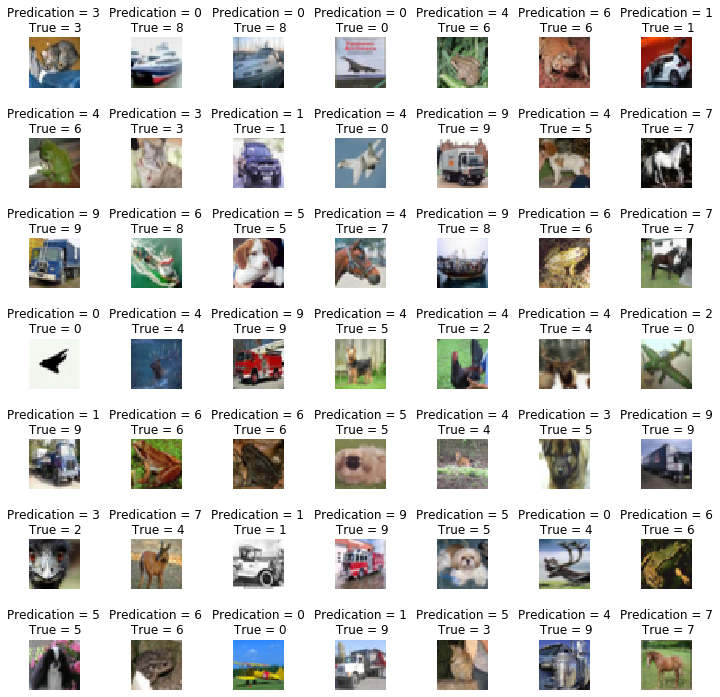

In [31]:
L = 7
W = 7 
fig, axes = plt.subplots(L, W, figsize = (12,12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(X_test[i])
    axes[i].set_title('Predication = {}\n True = {}'.format(predicted_classes[i],y_test[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 0.8)
plt.subplots_adjust(hspace = 1)


    

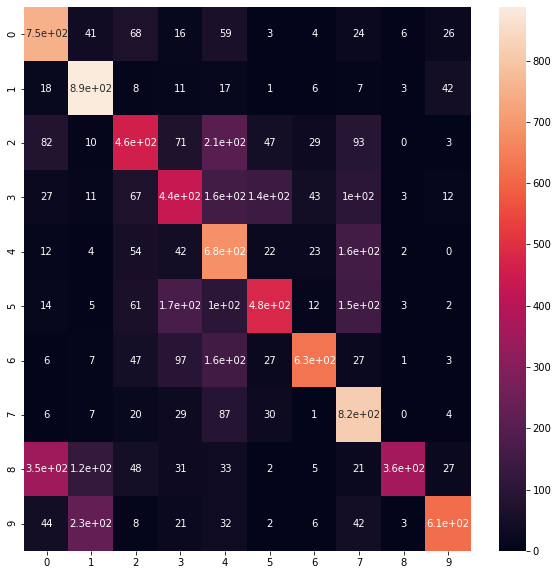

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns 

cm = confusion_matrix(y_test,predicted_classes)
cm

plt.figure(figsize= (10,10))
sns.heatmap(cm,annot=True)

In [33]:
## saving model 
import os 
directory = os.path.join(os.getcwd(), 'saved_models')

if not os.path.isdir(directory):
    os.makedirs(directory)

model_path = os.path.join(directory, 'keras_cifar_10_model.h5')
cnn_model.save(model_path)

In [34]:
## data augmentation 

import keras 
from keras.datasets import cifar10
(X_train, y_train), (X_test,y_test) = cifar10.load_data()

In [35]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

In [36]:
X_train.shape

(50000, 32, 32, 3)

In [37]:
n = 8 
X_train_sample = X_train[:n]

In [38]:
X_train_sample.shape

(8, 32, 32, 3)

In [39]:
from keras.preprocessing.image import ImageDataGenerator
dataget_train = ImageDataGenerator(rotation_range=90)

# dataget_train = ImageDataGenerator(vertical_flip=True)
# dataget_train = ImageDataGenerator(height_shift_range=0.5)
# dataget_train = ImageDataGenerator(brightness_range=(1,3))

dataget_train.fit(X_train_sample)

/Users/kumar.deepak/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: `toimage` is deprecated!
`toimage` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use Pillow's ``Image.fromarray`` directly instead.
  import sys


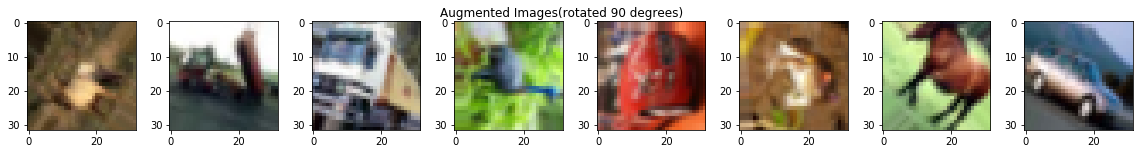

In [41]:
from scipy.misc import toimage

fig = plt.figure(figsize = (20,2))
for x_batch in dataget_train.flow(X_train_sample,batch_size= n):
    for i in range(0,n):
        ax = fig.add_subplot(1,n,i+1)
        ax.imshow(toimage(x_batch[i]))
    fig.suptitle('Augmented Images(rotated 90 degrees)')
    plt.show()
    break;

In [42]:
datagen = ImageDataGenerator(rotation_range= 30,
                            width_shift_range= 0.1,
                            horizontal_flip= True,
                            vertical_flip= True)

In [46]:
datagen.fit(X_train)

In [ ]:
cnn_model.fit_generator(datagen.flow(X_train,y_train,batch_size= 32),epochs = 2)